## Train linear regression using scikit-learn

In [1]:
import sklearn as sk

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [6]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [7]:
X_iris,y_iris = iris.data,iris.target

In [8]:
print X_iris.shape, y_iris.shape

(150L, 4L) (150L,)


In [9]:
print X_iris[0], y_iris.shape[0]

[ 5.1  3.5  1.4  0.2] 150


### Linear regression

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

In [11]:
X,y = X_iris[:,:2],y_iris

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state =33)

In [13]:
print X_train.shape, y_train.shape

(112L, 2L) (112L,)


In [14]:
#Standardize features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Visualization

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

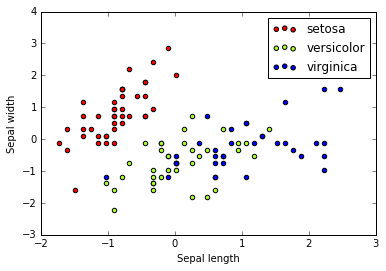

In [16]:
colors = ['red', 'greenyellow', 'blue']
for i in xrange(len(colors)):
    xs = X_train[:,0][y_train == i]
    ys = X_train[:,1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [17]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [18]:
print clf.coef_

[[-41.11324701   7.53435314]
 [  9.5695774  -14.17233629]
 [ 13.53582784   1.96232349]]


In [19]:
print clf.intercept_

[-11.81800069  -9.46804324   2.59163968]


In [20]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
print xs

[-2.22429277 -1.72429277 -1.22429277 -0.72429277 -0.22429277  0.27570723
  0.77570723  1.27570723  1.77570723  2.27570723  2.77570723]


In [21]:
print clf.predict(scaler.transform([[4.7,3.1]])) #Sentosa

[0]


In [22]:
print clf.decision_function(scaler.transform([[4.7,3.1]]))

[[ 40.67560021 -22.85911571 -14.27146938]]


### Model Evaluation

In [23]:
from sklearn import metrics

In [24]:
#Evaluating train error
y_train_pred = clf.predict(X_train)
print metrics.accuracy_score(y_train,y_train_pred)

0.723214285714


In [25]:
#Evaluatin test error
y_test_pred = clf.predict(X_test)
print metrics.accuracy_score(y_test,y_test_pred)

0.657894736842


In [26]:
print metrics.classification_report(y_test,y_test_pred,target_names=iris.target_names)

             precision    recall  f1-score   support

     setosa       1.00      0.88      0.93         8
 versicolor       0.33      0.09      0.14        11
  virginica       0.61      0.89      0.72        19

avg / total       0.61      0.66      0.60        38



In [27]:
print metrics.confusion_matrix(y_test,y_test_pred)

[[ 7  0  1]
 [ 0  1 10]
 [ 0  2 17]]


### Cross validation

In [28]:
from sklearn.cross_validation import cross_val_score,KFold
from sklearn.pipeline import Pipeline

In [30]:
# Create a composite estimator
clf = Pipeline([('scaler',preprocessing.StandardScaler()),
                ('linear_model',SGDClassifier())
                ])

In [32]:
#k = 5 folds
cv = KFold(X.shape[0],5,shuffle=True,random_state=33)

In [37]:
scores = cross_val_score(clf,X,y,cv=cv)

In [38]:
print scores

[ 0.7         0.73333333  0.76666667  0.6         0.56666667]


In [39]:
from scipy.stats import sem
def mean_score(scores):
    return("Mean score: {0:.3f} (+/-{1:.3f})".format(np.mean(scores),sem(scores)))

In [40]:
print mean_score(scores)

Mean score: 0.673 (+/-0.039)
